In [4]:
# pyecharts 库统一调用
from pyecharts import options as opts
from pyecharts.charts import Page, Pie, Line, Scatter3D, Scatter, Map, Bar
from pyecharts.globals import JsCode
import pymongo
import math
import time
import re

# 本篇分为四个部分
## 第一部分 知乎大 V 文章、回答随时间变化图及收藏夹、专栏前 50
## 第二部分 知乎用户相关数据
## 第三部分 图表绘制
## 第四部分 词云

# 第一部分 知乎大 V 文章、回答随时间变化图及收藏夹、专栏前 50
### 这里大 V 特指粉丝数 10w 以上用户
### 数据抓取日期 2019-7-23
1. 知乎月回答折线图
2. 知乎年回答数柱状图
3. 知乎月文章数折线图
4. 知乎年文章数柱状图

In [31]:
# 1 知乎按月回答折线图
# 10 w以上 938 位回答数据，874 位文章数据
def line_zh() -> Line: # 知乎 10 w 粉以上大 V，回答变化图
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
        myhp = mydb['user_answer_10w']
    get_ready()
    ss = myhp.find({})
    nz = {}
    for s in ss:
        timestamp = s['created_time']
        time_local = time.localtime(timestamp)
        #时间数组 转 新的时间格式(2016-05-05 20:28:54)
        dt = time.strftime("%Y-%m",time_local) # 时间
        nz[dt] = nz.get(dt, 0) + 1
    print(len(nz))
    nz = sorted(nz.items(), key=lambda item:item[0])
    x,y = [],[]
    for n in nz:
        x.append(n[0])
        y.append(n[1])
    c = (
        Line(init_opts = opts.InitOpts(width="1100px", height="500px"))
        .add_xaxis(x)
        .add_yaxis("知乎", y, is_smooth=True)
        .set_global_opts(title_opts=opts.TitleOpts(title="知乎大V回答数月变化图"),
                        toolbox_opts=opts.ToolboxOpts(), # 数据展示
                        yaxis_opts=opts.AxisOpts(name='数量/个'),
                        xaxis_opts=opts.AxisOpts(name='时间/月'),
                         datazoom_opts=opts.DataZoomOpts(is_show=True, range_start=0, range_end=90),
                        )
    )
    return c
# line_zh().render('C:\\Users\\yc\\Desktop\\zhihuhuida.html')

In [25]:
# 2 知乎年回答数柱状图
def bar7() -> Bar: #  
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
        myhp = mydb['user_answer_10w']
    get_ready()
    ss = myhp.find({})
    nz = {}
    for s in ss:
        timestamp = s['created_time']
        time_local = time.localtime(timestamp)
        #时间数组 转 新的时间格式(2016-05-05 20:28:54)
        dt = time.strftime("%Y",time_local) # 时间
        nz[dt] = nz.get(dt, 0) + 1
    #X轴，Y轴数据
    send_count = sorted(nz.items(), key=lambda item:item[0])
    x,y = [],[]
    for se in send_count:
        x.append(se[0])
        y.append(round(se[1],1))
    bar = (
        Bar(init_opts = opts.InitOpts(width="1100px", height="500px"))
        .add_xaxis(x)
        .add_yaxis("回答数", y)
        .set_global_opts(title_opts=opts.TitleOpts(title="知乎大V各年回答数"),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=True),
                    datazoom_opts=opts.DataZoomOpts(is_show=True, range_start=0, range_end=90),
                    xaxis_opts=opts.AxisOpts(name="年份",axislabel_opts=opts.LabelOpts(formatter="{value}", font_size=12, rotate=30,) # x,y 轴标签
                        ),
                    yaxis_opts=opts.AxisOpts(name='回答数/个',axislabel_opts=opts.LabelOpts(formatter="{value}")))
        .set_series_opts(label_opts=opts.LabelOpts(position='inside'), # 图上标签
    )

    )
    return bar
# bar7().render('C:\\Users\\yc\\Desktop\\huiday.html')

'C:\\Users\\yc\\Desktop\\huiday.html'

In [20]:
# 3 知乎按年文章数
def bar8() -> Bar: #  
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
        myhp = mydb['user_article_10w']
    get_ready()
    ss = myhp.find({})
    nz = {}
    for s in ss:
        timestamp = s['updated']
        time_local = time.localtime(timestamp)
        #时间数组 转 新的时间格式(2016-05-05 20:28:54)
        dt = time.strftime("%Y",time_local) # 时间
        nz[dt] = nz.get(dt, 0) + 1
    #X轴，Y轴数据
    send_count = sorted(nz.items(), key=lambda item:item[0])
    x,y = [],[]
    for se in send_count:
        x.append(se[0])
        y.append(round(se[1],1))
    bar = (
        Bar(init_opts = opts.InitOpts(width="1100px", height="500px"))
        .add_xaxis(x)
        .add_yaxis("文章数", y)
        .set_global_opts(title_opts=opts.TitleOpts(title="知乎大V各年文章数"),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=True),
                    datazoom_opts=opts.DataZoomOpts(is_show=True, range_start=0, range_end=90),
                    xaxis_opts=opts.AxisOpts(name="年份",axislabel_opts=opts.LabelOpts(formatter="{value}", font_size=12, rotate=30,) # x,y 轴标签
                        ),
                    yaxis_opts=opts.AxisOpts(name='文章数/篇',axislabel_opts=opts.LabelOpts(formatter="{value}")))
        .set_series_opts(label_opts=opts.LabelOpts(position='inside'), # 图上标签
    )

    )
    return bar
# bar8().render('C:\\Users\\yc\\Desktop\\article.html')

'C:\\Users\\yc\\Desktop\\article.html'

In [29]:
# 4 知乎按月回答
import pymongo # 10 w以上 938 位回答数据，874 位文章数据
import time

def line_ar() -> Line: # 知乎 10 w 粉以上大 V，回答变化图
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
        myhp = mydb['user_article_10w']
    get_ready()
    ss = myhp.find({})
    nz = {}
    for s in ss:
        timestamp = s['updated']
        time_local = time.localtime(timestamp)
        #时间数组 转 新的时间格式(2016-05-05 20:28:54)
        dt = time.strftime("%Y-%m",time_local) # 时间
        nz[dt] = nz.get(dt, 0) + 1
    print(len(nz))
    nz = sorted(nz.items(), key=lambda item:item[0])
    x,y = [],[]
    for n in nz:
        x.append(n[0])
        y.append(n[1])
    c = (
        Line(init_opts = opts.InitOpts(width="1100px", height="500px"))
        .add_xaxis(x)
        .add_yaxis("知乎", y, is_smooth=True)
        .set_global_opts(title_opts=opts.TitleOpts(title="知乎大V文章数月变化图"),
                        toolbox_opts=opts.ToolboxOpts(), # 数据展示
                        yaxis_opts=opts.AxisOpts(name='数量/篇'),
                        xaxis_opts=opts.AxisOpts(name='时间/月'),
                         datazoom_opts=opts.DataZoomOpts(is_show=True, range_start=0, range_end=90),
                        )
    )
    return c
# line_ar().render('C:\\Users\\yc\\Desktop\\ar.html')

73


'C:\\Users\\yc\\Desktop\\ar.html'

# 第二部分 知乎用户相关数据
* 数据：粉丝数大于 1w 的用户
* 抓取时间：2019-7-23
* 包括文章数、回答数、收藏数、点赞数、感谢数等。
* 绘制前50柱状图，其中收录回答数为前 53，收录文章数为前 52.
* 3d 三散点图

In [11]:
# 3d 散点图 粉丝数，回答数，点赞数
def scatter3d() -> Scatter3D:
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
    
    get_ready()
    ss = mycol.find({})
    c = 0
    rp,fa,fo = {},{},{}
    for s in ss:
        if '.' in s['user_id']:
            s['user_id'] = s['user_id'].replace('.','!---!')
        if 'followerCount' not in s['user_info'][s['user_id']]:
    #         mycol.delete_one(s)
            continue
        ans = s['user_info'][s['user_id']]['answerCount']
        fav = s['user_info'][s['user_id']]['favoritedCount']
        fol = s['user_info'][s['user_id']]['followerCount']
        rp[s['user_info'][s['user_id']]['name']] = round(math.log(ans,10), 1) if ans != 0 else -1 # z 
        fa[s['user_info'][s['user_id']]['name']] = round(math.log(fav,10), 1) if fav != 0 else -1 # x
        fo[s['user_info'][s['user_id']]['name']] = round(math.log(fol,10), 1) if fol != 0 else -1 # y
        c+=1
    print('人数：',c)   

    data = [ (fa[i],fo[i],rp[i],i) for i in rp ] # 提示框信息
    c = (
        Scatter3D(init_opts = opts.InitOpts(width="1100px", height="500px")) # init_opts = opts.InitOpts()
        .add("用户回答数、获得收藏数、粉丝数散点图", data,
#             label_opts=opts.LabelOpts(formatter="{value}/w"),
            xaxis3d_opts=opts.Axis3DOpts(type_='value', max_='dataMax',min_='datamin',name='获得收藏数'),
            yaxis3d_opts=opts.Axis3DOpts(type_='value', max_='dataMax',min_='datamin', name='粉丝数'),
            zaxis3d_opts=opts.Axis3DOpts(type_='value', max_='dataMax',min_='datamin', name='回答数'),
            grid3d_opts=opts.Grid3DOpts(width=150, depth=150, is_rotate=False),
#             itemstyle_opts=opts.ItemStyleOpts(opacity=0.9), # 透明度设置
            )
        .set_global_opts(
            title_opts=opts.TitleOpts("用户回答数、获得收藏数、粉丝数散点图", subtitle="Note: 坐标轴中-1，代表数量为0; 除此之外 x(获得收藏数) 、y(粉丝数) 轴刻度表示10的 x 或 y 方"),
            toolbox_opts=opts.ToolboxOpts(), # 数据展示
            visualmap_opts=opts.VisualMapOpts(max_=3.5, dimension=2,),
        )
       .set_series_opts(markpoint_opts=opts.MarkPointOpts(symbol_size=1),
                       )
    )
    return c
# scatter3d().render('C:\\Users\\yc\\Desktop\\happy.html')

In [12]:
# 3d 散点图 收藏回答，收藏文章、粉丝数
def scatter3d2() -> Scatter3D:
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
    
    get_ready()
    ss = mycol.find({})
    c = 0
    rp,fa,fo = {},{},{}
    for s in ss:
        if '.' in s['user_id']:
            s['user_id'] = s['user_id'].replace('.','!---!')
        if 'followerCount' not in s['user_info'][s['user_id']]:
    #         mycol.delete_one(s)
            continue
        ans = s['user_info'][s['user_id']]['includedAnswersCount']
        fav = s['user_info'][s['user_id']]['includedArticlesCount']
        fol = s['user_info'][s['user_id']]['followerCount']
        rp[s['user_info'][s['user_id']]['name']] = round(math.log(ans,10), 1) if ans != 0 else -1 # x
        fa[s['user_info'][s['user_id']]['name']] = round(math.log(fav,10), 1) if fav != 0 else -1 # y
        fo[s['user_info'][s['user_id']]['name']] = round(math.log(fol,10), 1) if fol != 0 else -1 # z
        c+=1
    print('人数：',c)   

    data = [ (rp[i],fa[i],fo[i],i) for i in rp ] # 提示框信息
    c = (
        Scatter3D(init_opts = opts.InitOpts(width="1100px", height="500px")) # init_opts = opts.InitOpts()
        .add("用户收藏回答数、文章数，粉丝数散点图", data,
#             label_opts=opts.LabelOpts(formatter="{value}/w"),
            xaxis3d_opts=opts.Axis3DOpts(type_='value', max_='dataMax',min_='datamin',name='收录回答数'),
            yaxis3d_opts=opts.Axis3DOpts(type_='value', max_='dataMax',min_='datamin', name='收录文章数'),
            zaxis3d_opts=opts.Axis3DOpts(type_='value', max_='dataMax',min_='datamin', name='粉丝数'),
            grid3d_opts=opts.Grid3DOpts(width=150, depth=150, is_rotate=False),
#             itemstyle_opts=opts.ItemStyleOpts(opacity=0.9), # 透明度设置
            )
        .set_global_opts(
            title_opts=opts.TitleOpts("用户收藏回答数、文章数，粉丝数散点图", subtitle="Note: 坐标轴中-1，代表数量为0; 除此之外 x(收录回答数) 、y(收录文章数) 轴刻度表示10的 x 或 y 方"),
            toolbox_opts=opts.ToolboxOpts(), # 数据展示
            visualmap_opts=opts.VisualMapOpts(max_=5.7, min_=4,dimension=2,),
        )
       .set_series_opts(markpoint_opts=opts.MarkPointOpts(symbol_size=1),
                       )
    )
    return c
# scatter3d2().render('C:\\Users\\yc\\Desktop\\include.html')

In [33]:
# 柱状图 1
def barm(cl='voteupCount',n=901220,title="获得赞同数",yname='') -> Bar: #  
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
    
    get_ready()
    ss = mycol.find({})
    c = 0
    lz = {}
    for s in ss:
        if '.' in s['user_id']:
            s['user_id'] = s['user_id'].replace('.','!---!')
        if 'followerCount' not in s['user_info'][s['user_id']]:
    #         mycol.delete_one(s)
            continue
        if s['user_info'][s['user_id']][cl]>n:
            lz[s['user_info'][s['user_id']]['name']] = s['user_info'][s['user_id']][cl]
            c+=1
    print('人数：',c)   
    #X轴，Y轴数据
    send_count = sorted(lz.items(), key=lambda item:item[1], reverse=True)
    x,y = [],[]
    for se in send_count:
        x.append(se[0])
        y.append(se[1])
    bar = (
        Bar(init_opts = opts.InitOpts(width="1100px", height="500px"))
        .add_xaxis(x)
        .add_yaxis("用户", y)
        .set_global_opts(title_opts=opts.TitleOpts(title="知乎"+ title +"前50用户"),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=True),
                    datazoom_opts=opts.DataZoomOpts(is_show=True, range_start=0, range_end=50),
                    xaxis_opts=opts.AxisOpts(name="姓名",axislabel_opts=opts.LabelOpts(formatter="{value}", font_size=12, rotate=30,) # x,y 轴标签
                        ),
                    yaxis_opts=opts.AxisOpts(name=title+yname,axislabel_opts=opts.LabelOpts(formatter="{value}")))
        .set_series_opts(label_opts=opts.LabelOpts(position='inside'), # 图上标签
    )

    )
    return bar
# barm(cl='voteupCount',n=901220,title="获得赞同数").render('C:\\Users\\yc\\Desktop\\voteup50.html')
# barm(cl='thankedCount',n=154000,title="获得感谢数").render('C:\\Users\\yc\\Desktop\\thanked50.html')
# barm(cl='articlesCount',n=1220,title="文章数").render('C:\\Users\\yc\\Desktop\\article50.html')
# barm(cl='answerCount',n=4780,title="回答数").render('C:\\Users\\yc\\Desktop\\answer50.html')
# barm(cl='includedAnswersCount',n=69,title="收录回答数").render('C:\\Users\\yc\\Desktop\\includeanswer50.html')
# barm(cl='includedArticlesCount',n=42,title="收录文章数").render('C:\\Users\\yc\\Desktop\\includearticle50.html')

In [34]:
# 柱状图 2
def barm2(cl='voteupCount',n=901220,title="获得赞同数",yname='') -> Bar: #  
    def get_ready(ch='user_info',dbname='zhihu'):
        '''数据库调用'''
        global mycol, myclient,myhp
        myclient = pymongo.MongoClient("mongodb://localhost:27017/")
        mydb = myclient[dbname]
        mycol = mydb[ch]
    
    get_ready()
    ss = mycol.find({})
    c = 0
    lz = {}
    for s in ss:
        if '.' in s['user_id']:
            s['user_id'] = s['user_id'].replace('.','!---!')
        if 'followerCount' not in s['user_info'][s['user_id']]:
    #         mycol.delete_one(s)
            continue
        if s['user_info'][s['user_id']][cl]>n:
            lz[s['user_info'][s['user_id']]['name']] = s['user_info'][s['user_id']][cl]
            c+=1
    print('人数：',c)   
    #X轴，Y轴数据
    send_count = sorted(lz.items(), key=lambda item:item[1], reverse=True)
    x,y = [],[]
    for se in send_count:
        x.append(se[0])
        y.append(round(se[1]/10000,1))
    bar = (
        Bar(init_opts = opts.InitOpts(width="1100px", height="500px"))
        .add_xaxis(x)
        .add_yaxis("用户", y)
        .set_global_opts(title_opts=opts.TitleOpts(title="知乎"+ title +"前50用户"),
                    toolbox_opts=opts.ToolboxOpts(),
                    legend_opts=opts.LegendOpts(is_show=True),
                    datazoom_opts=opts.DataZoomOpts(is_show=True, range_start=0, range_end=50),
                    xaxis_opts=opts.AxisOpts(name="姓名",axislabel_opts=opts.LabelOpts(formatter="{value}", font_size=12, rotate=30,) # x,y 轴标签
                        ),
                    yaxis_opts=opts.AxisOpts(name=title+yname,axislabel_opts=opts.LabelOpts(formatter="{value}")))
        .set_series_opts(label_opts=opts.LabelOpts(position='inside'), # 图上标签
    )

    )
    return bar
# barm2(cl='followerCount',n=482000,title="粉丝数",yname="/w").render('C:\\Users\\yc\\Desktop\\follow50.html')
# barm2(cl='favoritedCount',n=790000,title="获得收藏数",yname="/w").render('C:\\Users\\yc\\Desktop\\favorited50.html')

# 第三部分 图表绘制
* 用户数据
* 专栏，收藏等详细数据

In [35]:
# 用户
page = Page()
page.add(barm(cl='answerCount',n=4780,title="回答数"), barm(cl='includedAnswersCount',n=69,title="收录回答数"),barm(cl='articlesCount',n=1220,title="文章数"),barm(cl='includedArticlesCount',n=42,title="收录文章数"),barm2(cl='followerCount',n=482000,title="粉丝数",yname="/w"),barm2(cl='voteupCount',n=901220,title="获得赞同数",yname="/w"),barm2(cl='thankedCount',n=154000,title="获得感谢数",yname="/w"),barm2(cl='favoritedCount',n=790000,title="获得收藏数",yname="/w"),
         scatter3d(),scatter3d2()
        )
page.render('C:\\Users\\yc\\Desktop\\zhihu_user.html')

人数： 50
人数： 53
人数： 50
人数： 52
人数： 50
人数： 50
人数： 50
人数： 50
人数： 9385
人数： 9385


In [32]:
# 专栏，收藏
page = Page()
page.add(bar5(),bar6(),line_zh(),line_ar(),bar7(),bar8())
page.render('C:\\Users\\yc\\Desktop\\zhihu_p.html')

人数： 50
人数： 50
104
73


In [6]:
# gephi
import pymongo
def get_ready(ch='user_pd',dbname='zhihu'):
    '''数据库调用'''
    global mycol, myclient,myhp
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready()
ss = mycol.find({})
ss2 = mycol.find({})
dz,dz2,z,zn = {1,},{1,},{},{}
node,edge = [],[]
namev = []
for s in ss:
    z[s['user_id']] = s['follower_count']
    zn[s['user_id']] = s['name']
for s in ss2:
    if s['follower_count']>500000:
        if s['from'] in z and z[s['from']]>500000 and (s['user_id'],s['from']) not in dz2:
            dz2.add((s['user_id'],s['from']))
            edge.append([zn[s['user_id']],zn[s['from']],s['follower_count']])
        if s['user_id'] not in dz:
            node.append([s['user_id'],zn[s['user_id']],s['follower_count']])
            namev.append(zn[s['user_id']]) # 大v名字
            dz.add(s['user_id'])
print(len(node),len(edge))

50 774


In [36]:
# print(node)
# print(len(namev),namev)
# print(edge)

In [58]:
# 转换为数字
nz = {}
for i,n in enumerate(node):
    nz[n[1]] = i 

edgen = []
for e in edge:
    if nz[e[0]] in {37,28,39,27,45,9,8,34,30,6} and nz[e[1]] in {37,28,39,27,45,9,8,34,30,6}:
        edgen.append([nz[e[0]],nz[e[1]],e[2]])
print(edgen)
noden = []
for z in nz:
    noden.append([nz[z],z])
print(noden)

[[6, 28, 897238], [8, 28, 974899], [27, 6, 2225802], [28, 6, 2251527], [34, 6, 933247], [30, 6, 897489], [9, 6, 1072526], [8, 6, 974899], [37, 8, 3991087], [45, 8, 1274837], [39, 8, 2336709], [8, 9, 974899], [34, 27, 933248], [37, 27, 3991188], [30, 27, 897489], [45, 27, 1274837], [28, 27, 2251526], [28, 30, 2251527], [34, 30, 933248], [6, 30, 897242], [9, 30, 1072526], [8, 30, 974898], [45, 34, 1274836], [27, 34, 2225806], [6, 34, 897242], [9, 34, 1072526], [8, 34, 974899], [27, 37, 2225817], [28, 37, 2251530], [34, 37, 933249], [39, 37, 2337133], [8, 37, 974899], [6, 39, 897245], [37, 39, 3991539], [45, 39, 1274843], [27, 39, 2225817], [34, 39, 933249], [28, 39, 2251530], [9, 39, 1072526], [8, 39, 974899], [27, 45, 2225833]]
[[0, '穷游锦囊'], [1, '斌卡'], [2, '王尼玛'], [3, '肥肥猫'], [4, '张亮'], [5, '动机在杭州'], [6, '李淼'], [7, 'chenqin'], [8, '周源'], [9, '李开复'], [10, 'maggie'], [11, '无耻采铜'], [12, '陈柏龄'], [13, '朱炫'], [14, '黄继新'], [15, '梁边妖'], [16, '葛巾'], [17, '马伯庸'], [18, 'cOMMANDO'], [19, '中国科普博览'],

In [59]:
import pandas as pd

# ndf = pd.DataFrame(node)
edf = pd.DataFrame(edgen)
# ndf.to_csv('C:\\Users\\yc\\Desktop\\node.csv', sep=',', encoding='utf_8_sig')
edf.to_csv('C:\\Users\\yc\\Desktop\\e10.csv', sep=',', encoding='utf_8_sig')

49516 53339


# 第四部分 词云
* 数据：粉丝数大于等于 1w 用户
* 用户个人信息词云

In [64]:
# 词云
import pymongo
def get_ready(ch='user_info',dbname='zhihu'):
    '''数据库调用'''
    global mycol, myclient,myhp
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready()
ss = mycol.find({})
with open(r'C:\Users\yc\Desktop\zhihuv.txt', 'w', encoding='utf8') as f:
    for i,s in enumerate(ss):
#         print(s)
        if i>=0:
            record = []
            rep = s['user_id'].replace('.', '!---!') if '.' in s['user_id'] else s['user_id']
#             print(s['user_id'])
            headline = s['user_info'][rep]['headline'] # 描述
            mydes = s['user_info'][rep]['description'] # 自我简介
            caree = s['user_info'][rep]['business']['name'] # 职业
            record.extend([headline, mydes, caree])

            if s['user_info'][rep]['locations']:
                loca = s['user_info'][rep]['locations'][0]['name'] # 居住地
                record.append(loca)
            if s['user_info'][rep]['employments']:
                for w in s['user_info'][rep]['employments']:
                    if 'job' in w:
                        work = w['job']['name'] # 工作
                        record.append(work)
                    if 'company' in w:
                        company = w['company']['name'] # 公司
                        record.append(company)
            if s['user_info'][rep]['educations']:
                for e in s['user_info'][rep]['educations']:
                    if 'school' in e:
                        school = e['school']['name'] # 学校
                        record.append(school)
                    if 'major' in e:
                        major = e['major']['name'] # 专业
                    record.append(major)
            f.write(",".join(record)) # 列表转字符串

In [105]:
# 分词
import jieba.analyse

# 数据生成---------------------------
jieba.load_userdict(r'C:\Users\yc\Desktop\jieba2.txt')
jieba.analyse.set_stop_words(r'C:\Users\yc\Desktop\stop2.txt') 
with open(r'C:\Users\yc\Desktop\zhihuv.txt', 'rb' ) as f:
    sentence = f.read()
a = jieba.analyse.extract_tags(sentence, topK=300, withWeight=True, allowPOS=())
print(a)

[('公众号', 0.1694499799170197), ('微信', 0.11480064202932651), ('3A', 0.09004179388659618), ('互联网', 0.05947175825140716), ('知乎', 0.05613063649452324), ('私信', 0.0502512777068371), ('微博', 0.05004673150218566), ('维权骑士', 0.044862186378280586), ('University', 0.039413123646013015), ('北京', 0.0384383784634798), ('大学', 0.02971240164310006), ('咨询', 0.0273066921668987), ('创始人', 0.023614803880149443), ('文章', 0.02289166746332765), ('维权行动', 0.02226465855556593), ('上海', 0.022210986441598333), ('关注', 0.022041277532240045), ('欢迎', 0.02047004478298735), ('转载', 0.017607145739333814), ('爱好者', 0.017077384611208682), ('专业', 0.016909909976870953), ('艺术', 0.016560692888448355), ('委托', 0.016381893731207534), ('创意', 0.014598095754361362), ('值乎', 0.01438975789492019), ('ID', 0.014336854373247688), ('internal', 0.013807819156522681), ('健身', 0.013650198551361799), ('专栏', 0.013514860092910745), ('学院', 0.013015153631474733), ('教育', 0.012916117346512195), ('分享', 0.012805936672638235), ('公号', 0.012696845201400166), ('干货'

In [31]:
a = [('公众号', 0.16945072978859638), ('微信', 0.11480115005971094), ('互联网', 0.05947202143338657), ('知乎', 0.05613088489094622), ('私信', 0.05025150008517471), ('微博', 0.05004695297533942), ('维权骑士', 0.04486238490812667), ('University', 0.039413298061974494), ('北京', 0.038438548565875065), ('大学', 0.029712533130194226), ('咨询', 0.027306813007941695), ('创始人', 0.0236149083833794), ('文章', 0.02289176876644248), ('维权行动', 0.02226475708396129), ('上海', 0.022211084732477033), ('关注', 0.022041375072101323), ('欢迎', 0.020470135369629865), ('转载', 0.017607223656711805), ('爱好者', 0.017077460184220433), ('专业', 0.01690998480875268), ('艺术', 0.016560766174930255), ('委托', 0.01638196622644469), ('创意', 0.014598160355709114), ('值乎', 0.014389821574304781), ('ID', 0.014336917818516896), ('健身', 0.013650258957954435), ('专栏', 0.013514919900586444), ('学院', 0.013015211227785919), ('教育', 0.012916174504555431), ('分享', 0.01280599334309596), ('公号', 0.012696901389092453), ('干货', 0.012679945424346379), ('金融', 0.012547482912211248), ('学习', 0.012501600156076816), ('工程师', 0.0124578309689119), ('硕士', 0.012286411748674791), ('设计', 0.012033990778034093), ('CEO', 0.011903345052274176), ('游戏', 0.011898210991132), ('本人', 0.011468401979040853), ('高等教育', 0.010888642916976176), ('心理咨询', 0.010872490322916999), ('媒体', 0.010868565722434682), ('心理学', 0.01077805433241685), ('回答', 0.010735404730628308), ('设计师', 0.010551738667067335), ('科技', 0.010530366925598215), ('中国', 0.01040937892099384), ('版权保护', 0.010253315798500699), ('技术', 0.010191949016436374), ('电影', 0.009899667166748448), ('运营', 0.009775486051709062), ('作者', 0.0097687571621939), ('weibo', 0.009628483553395111), ('博士', 0.00961975019720461), ('产品', 0.00955848375555653), ('清华大学', 0.009547726225694069), ('科研', 0.00953722329272985), ('专注', 0.009531068893907165), ('约稿', 0.009258157262879914), ('生活', 0.00920735415205614), ('旅行', 0.009021313306090312), ('计算机软件', 0.008953753578407945), ('摄影', 0.008938912735740356), ('投资', 0.008917525813053032), ('北京大学', 0.00889763316467465), ('管理', 0.008894619036529305), ('知识', 0.008618564846378754), ('授权', 0.008601552345633263), ('世界', 0.008426897229871489), ('临床', 0.00834858223278561), ('维权', 0.008061775376748449), ('付费', 0.008036133095844087), ('计算机科学', 0.007988358917176907), ('杭州', 0.007940300691250332), ('医疗', 0.007916478180170286), ('研究', 0.007883214129624025), ('信号', 0.007824401263355459), ('传媒', 0.007797816822777557), ('经理', 0.007638640740829173), ('有趣', 0.0076180121568477956), ('职业', 0.007577706819344698), ('美食', 0.0075278122313998195), ('科普', 0.00746564917119497), ('创业', 0.007325837476287239), ('id', 0.007300718298728161), ('法律', 0.0072925716410270295), ('英语', 0.007290197661617812), ('深圳市', 0.007272226826274494), ('培训', 0.0072586243500677074), ('平台', 0.007046478430138468), ('总监', 0.007034099769531536), ('加入', 0.0068984531209388775), ('服务', 0.006879462162335908), ('有限公司', 0.006872150424787451), ('人生', 0.006848805127269042), ('科学', 0.00681237106797143), ('故事', 0.006798249409579815), ('信息', 0.006765765057600366), ('电子游戏', 0.006617926120440585), ('提问', 0.006517163342711487), ('合作', 0.006436940158082948), ('情感', 0.006396103068464323), ('成都', 0.0063441845489573935), ('汽车', 0.006233799515841609), ('经济学', 0.0060833760413613195), ('职场', 0.006043783665425363), ('工程', 0.006031942895702786), ('体育', 0.00603141017733883), ('数学', 0.006024277954856354), ('娱乐', 0.006012464756778716), ('心理', 0.005996769381832086), ('摄影师', 0.00597265527692369), ('美国', 0.005922963847709097), ('计划', 0.00587649577121608), ('工作', 0.005858526245907679), ('资深', 0.005858200264916893), ('交流', 0.005852322515919893), ('工作室', 0.005844318389062449), ('谢谢', 0.005840178572781805), ('提供', 0.0058248276524459665), ('音乐', 0.005809013880085232), ('在读', 0.005807011360195068), ('护肤', 0.005681201099964597), ('评论', 0.005668197474994822), ('答案', 0.005618334375889579), ('分析', 0.005594413950756731), ('临床医学', 0.005585338935978794), ('公司', 0.005565936088299524), ('MBA', 0.005554894357727948), ('github', 0.005501990601940063), ('律师', 0.005501629047042376), ('广州', 0.005456120209690935), ('高新科技', 0.005446682396820844), ('内容', 0.005430291038749358), ('留学', 0.005367954259300445), ('程序员', 0.0052403402986210676), ('广州市', 0.005231821225703406), ('老师', 0.005189623487858673), ('复旦大学', 0.005137382717799374), ('广告', 0.005089764566223249), ('考研', 0.005074345063543713), ('课程', 0.004963280978536766), ('文化', 0.0049320117688862785), ('腾讯', 0.004911193006581701), ('文学', 0.004905537683916591), ('品牌', 0.004887749874743641), ('深圳', 0.0048656763892439775), ('旅游', 0.0048571218671331845), ('国际', 0.0047904928745349865), ('如需', 0.004790187281276795), ('康复', 0.004787502265792222), ('编辑', 0.0047296391783889155), ('物理', 0.004723443965105588), ('领域', 0.004718382020138645), ('更新', 0.0047126094246296), ('希望', 0.004653135483981909), ('高级', 0.0046306181289150865), ('北京市', 0.00459363266610111), ('数据', 0.0045703584626955555), ('历史', 0.004542700395679332), ('教练', 0.004478050826212098), ('动画', 0.004457205430540067), ('联系', 0.004420731277661303), ('应用', 0.004415203452255147), ('广播电视', 0.004404413858423875), ('医生', 0.004390971139171003), ('自由', 0.004386628123471934), ('联合', 0.004375384511240331), ('编剧', 0.004370272610708185), ('工商管理', 0.004349048273931283), ('APP', 0.004338107974606588), ('本科', 0.004335187217346131), ('教师', 0.004297723025750757), ('合伙人', 0.004286731958034978), ('营销', 0.004275387836506469), ('写作', 0.004274643020855505), ('致力于', 0.004273916387061849), ('计算机', 0.004245988904616855), ('专家', 0.004239122825118289), ('浙江大学', 0.004216946005988884), ('网站', 0.004198949933597525), ('私人', 0.004198116410581842), ('电商', 0.0041882421713375995),('版权', 0.004136593771303347), ('南京', 0.004133692027965322), ('热爱', 0.004129809501175013), ('咨询师', 0.004106028201370081), ('建筑', 0.004091292033939116)]

分词前300包含城市排行：
北京、上海、深圳、广州、杭州、成都、南京

建筑 0.004091292033939116


E:\setup\envs\py3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


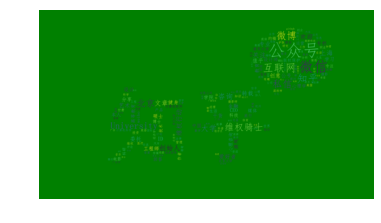

In [35]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread

#显示图形
%matplotlib inline 


b = {}
for i,j in a:
    b[i] = j
print(i,j)

# wordcloud 部分设置
font_path = r'C:\Users\yc\Desktop\SIMFANG.ttf' # 字体 # wordcloud设置
back_coloring = imread(r'C:\Users\yc\Desktop\get.png')  # 设置背景图片


# 设置词云属性
wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="green", max_words=2000, mask=back_coloring, # 词云背景颜色图此处修改
               max_font_size=100, random_state=4, width=1000, height=860, margin=2,
#                contour_width=1, contour_color='black',
               )
# 根据频率生成词云
wc.generate_from_frequencies(b)
# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

# 显示图片
plt.figure()
# plt.imshow(wc.recolor(color_func=image_colors_default), interpolation="bilinear")
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file(r'C:\Users\yc\Desktop\zhihu1.jpg') # 保存文件